In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df= pd.read_excel('C:\\Users\\Admin\\Desktop\\data analyst\\datasets\\Online_Retail.xlsx')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df = df.loc[df['Quantity'] > 0]

In [6]:
df = df[pd.notnull(df['CustomerID'])]

In [8]:
print('Date Range:%s-%s'%(df['InvoiceDate'].min(),df['InvoiceDate'].max()))

Date Range:2010-12-01 08:26:00-2011-12-09 12:50:00


In [9]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']


In [10]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

C:\Users\Admin\AppData\Local\Temp\ipykernel_24728\3178550718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity'] * df['UnitPrice']


In [11]:
orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
'Sales': sum,
'InvoiceDate': max
})

In [12]:
orders_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17758 rows x 2 columns]

In [14]:
##data analysis
def groupby_mean(x):
    return x.mean()
def groupby_count(x):
    return x.count()
def purchase_duration(x):
    return (x.max() - x.min()).days
def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()
groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'
summary_df = orders_df.reset_index().groupby('CustomerID').agg({
'Sales': [min, max, sum, groupby_mean, groupby_count],
'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})

In [15]:
summary_df

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000     1   
12347.0       382.52   1294.32   4085.18    680.863333     6   
12348.0       227.44    892.80   1797.24    449.310000     4   
12349.0      1757.55   1757.55   1757.55   1757.550000     1   
12350.0       334.40    334.40    334.40    334.400000     1   
...              ...       ...       ...           ...   ...   
18280.0       180.60    180.60    180.60    180.600000     1   
18281.0        80.82     80.82     80.82     80.820000     1   
18282.0       100.21    100.21    100.21    100.210000     1   
18283.0         1.95    313.65   1886.88    125.792000    15   
18287.0        70.68   1001.32   1837.28    612.426667     3   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
...                        ...                 ...               ...   
18280.0    2011-03-07 09:52:00 2011-03-07 09:52:00                 0   
18281.0    2011-06-12 10:53:00 2011-06-12 10:53:00                 0   
18282.0    2011-08-05 13:35:00 2011-08-05 13:35:00                 0   
18283.0    2011-01-06 14:14:00 2011-11-30 12:59:00               327   
18287.0    2011-05-22 10:39:00 2011-10-28 09:29:00               158   

                               
           purchase_frequency  
CustomerID                     
12346.0              0.000000  
12347.0             54.500000  
12348.0             70.500000  
12349.0              0.000000  
12350.0              0.000000  
...                       ...  
18280.0              0.000000  
18281.0              0.000000  
18282.0              0.000000  
18283.0             21.800000  
18287.0             52.666667  

[4298 rows x 9 columns]

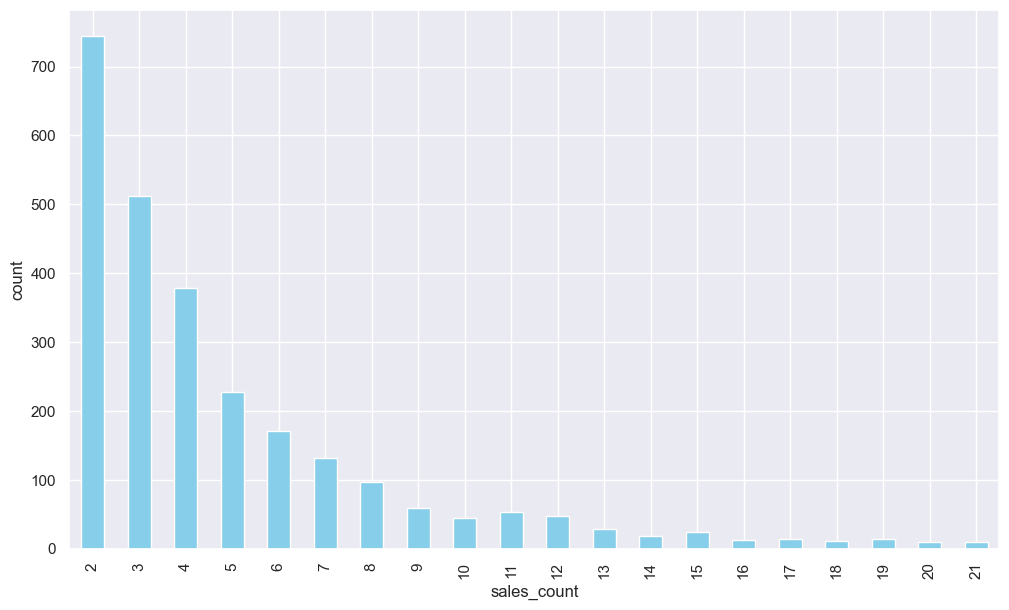

In [16]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]
ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(
kind='bar',
color='skyblue',
figsize=(12,7),
grid=True
)
ax.set_ylabel('count')
plt.show()

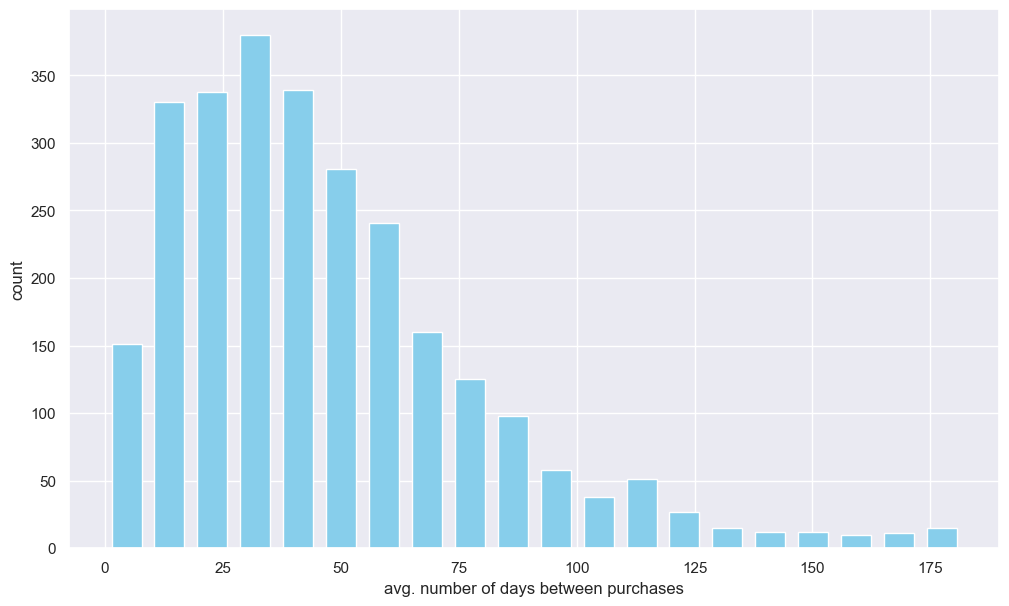

In [17]:
ax = summary_df['invoicedate_purchase_frequency'].hist(
bins=20,
color='skyblue',
rwidth=0.7,
figsize=(12,7)
)
ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')
plt.show()

In [18]:
## data preparation
clv_freq = '3M'
data_df = orders_df.reset_index().groupby([
'CustomerID',
pd.Grouper(key='InvoiceDate', freq=clv_freq)
]).agg({
'Sales': [sum, groupby_mean, groupby_count],
})
data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()

In [19]:
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1
1,12347.0,2010-12-31,711.79,711.790,1
2,12347.0,2011-03-31,475.39,475.390,1
3,12347.0,2011-06-30,1018.77,509.385,2
4,12347.0,2011-09-30,584.91,584.910,1


In [20]:
date_month_map = {
str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True)
)
}
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

In [21]:
features_df = pd.pivot_table(
data_df.loc[data_df['M'] != 'M_1'],
values=['sales_sum', 'sales_avg', 'sales_count'],
columns='M',
index='CustomerID'
)
features_df.columns = ['_'.join(col) for col in features_df.columns]

In [22]:
features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352.0,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN


In [23]:
features_df = features_df.fillna(0)

In [24]:
response_df = data_df.loc[
data_df['M'] == 'M_1',
['CustomerID', 'sales_sum']
]
response_df.columns = ['CustomerID', 'CLV_'+clv_freq]

In [25]:
response_df.head()

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67


In [26]:
sample_set_df = features_df.merge(
response_df,
left_index=True,
right_on='CustomerID',
how='left'
)
sample_set_df = sample_set_df.fillna(0)

In [27]:
from sklearn.model_selection import train_test_split
target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID',
target_var]]
x_train, x_test, y_train, y_test = train_test_split(
sample_set_df[all_features],
sample_set_df[target_var],
test_size=0.3
)

In [28]:
from sklearn.linear_model import LinearRegression
reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

LinearRegression()

In [29]:
reg_fit.intercept_

-32.07658885133043

In [30]:
reg_fit.coef_

array([ 2.24859121e-01,  1.89910933e-03,  3.64834866e-01, -3.51113246e-01,
        2.38977983e+01,  2.52568580e+01,  6.55000329e+01, -5.04589667e+01,
        4.00956598e-01,  1.56242107e-01, -3.34940141e-01,  8.89306830e-01])

In [32]:
coef=pd.DataFrame(list(zip(all_features,reg_fit.coef_)))
coef.columns=['features','coef']
coef.head()

,features,coef
0,sales_avg_M_2,0.224859
1,sales_avg_M_3,0.001899
2,sales_avg_M_4,0.364835
3,sales_avg_M_5,-0.351113
4,sales_count_M_2,23.897798


In [33]:
# evaulating the models
train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [34]:
from sklearn.metrics import r2_score, median_absolute_error


In [36]:
r2_score(y_true=y_train, y_pred=train_preds)

0.6406942615836556

In [37]:
median_absolute_error(y_true=y_train, y_pred=train_preds)

177.46318443632484

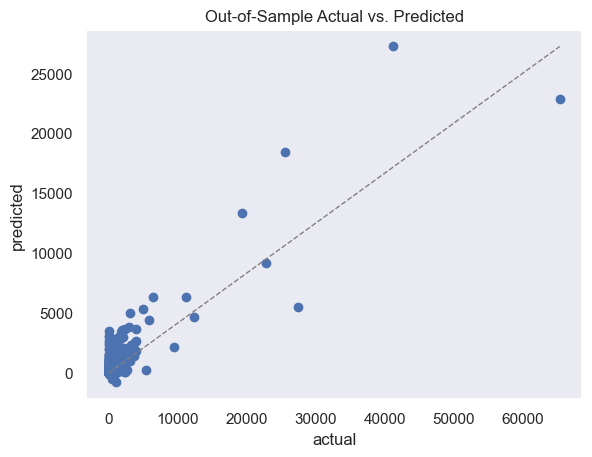

In [38]:
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()
plt.show()